In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt

## Load data into DataFrame

In [2]:
df_train = pd.read_csv('dataset/train.csv').fillna(method='backfill')
# df_test = pd.read_csv('dataset/test.csv').fillna(method='backfill')

In [3]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]
del df_train

## Reviewing the data for any changes

In [58]:
X.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,0.12,9.0,6.0,324.0,Aluminium,5.81,16.31,No,No,No,Airways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 4862 to 1855
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Reputation      5200 non-null   float64
 1   Height                 5200 non-null   float64
 2   Width                  5200 non-null   float64
 3   Weight                 5200 non-null   float64
 4   Material               5200 non-null   object 
 5   Price Of Sculpture     5200 non-null   float64
 6   Base Shipping Price    5200 non-null   float64
 7   International          5200 non-null   object 
 8   Express Shipment       5200 non-null   object 
 9   Installation Included  5200 non-null   object 
 10  Transport              5200 non-null   object 
 11  Fragile                5200 non-null   object 
 12  Customer Information   5200 non-null   object 
 13  Remote Location        5200 non-null   object 
 14  Scheduled Date         5200 non-null   object 
 15  D

In [8]:
X.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price
count,5200.000000,5200.000000,5200.000000,5.200000e+03,5200.000000,5200.000000
mean,0.465050,21.809615,9.634231,4.255966e+05,1285.065715,37.528637
std,0.265213,11.990439,5.436342,2.843201e+06,9613.305038,26.999042
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000
25%,0.240000,12.000000,6.000000,5.207500e+02,5.230000,16.657500
50%,0.450000,20.000000,8.000000,3.156000e+03,8.155000,23.520000
75%,0.680000,30.000000,12.000000,3.723725e+04,91.225000,58.132500
max,1.000000,73.000000,50.000000,1.179279e+08,382385.670000,99.980000


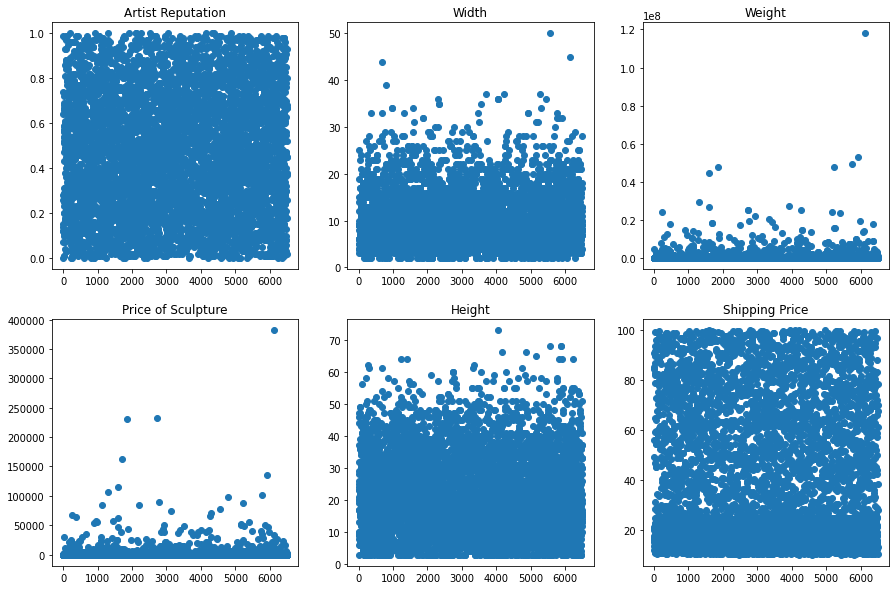

In [39]:
x = X['Artist Reputation'].values
f, axarr = plt.subplots(2,3, figsize=(15,10))
axarr[0,0].scatter(range(x.shape[0]), x)
# axarr[0,0].xlabel('index')
axarr[0,0].set_title('Artist Reputation')

x = X['Width']
axarr[0,1].scatter(range(x.shape[0]), x)
# axarr[0,1].xlabel('index')
axarr[0,1].set_title('Width')

x = X['Weight']
axarr[0,2].scatter(range(x.shape[0]), x)
# axarr[0,1].xlabel('index')
axarr[0,2].set_title('Weight')

x = X['Price Of Sculpture'].values
axarr[1,0].scatter(range(x.shape[0]), x)
# axarr[1,0].xlabel('index')
axarr[1,0].set_title('Price of Sculpture')

x = X['Height'].values
axarr[1,1].scatter(range(x.shape[0]), x)
# axarr[1,1].xlabel('index')
axarr[1,1].set_title('Height')

x = X['Base Shipping Price']
axarr[1,2].scatter(range(x.shape[0]), x)
# axarr[0,1].xlabel('index')
axarr[1,2].set_title('Shipping Price')
plt.show()

In [72]:
index_to_remove = set()
X.loc[X['Weight'] > 60000000]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
6133,fffe3800330034003300,Charles Palos,0.68,52.0,45.0,117927869.0,Stone,382385.67,38.89,No,No,Yes,Airways,No,Working Class,No,03/15/17,03/16/17,"Morrisshire, HI 99807"


In [73]:
index_to_remove.update(X.loc[X['Width'] > 40].index)
X.loc[X['Width'] > 40]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
686,fffe3800350032003700,Margaret Hensley,0.14,61.0,44.0,61924.0,Clay,102.17,44.45,No,No,No,Roadways,Yes,Working Class,Yes,11/10/18,11/06/18,"Harrishaven, GA 55033"
5573,fffe3500340034003800,James White,0.24,68.0,50.0,25522.0,Aluminium,65.07,40.52,No,No,No,Roadways,No,Working Class,No,12/09/15,12/11/15,"Andreaberg, MA 18119"
6133,fffe3800330034003300,Charles Palos,0.68,52.0,45.0,117927869.0,Stone,382385.67,38.89,No,No,Yes,Airways,No,Working Class,No,03/15/17,03/16/17,"Morrisshire, HI 99807"


In [74]:
index_to_remove.update(X.loc[X['Price Of Sculpture']>200000].index)
X.loc[X['Price Of Sculpture']>200000]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
1860,fffe3400340033003800,Patricia Smith,0.77,47.0,32.0,47544217.0,Stone,230578.77,72.83,No,Yes,Yes,Waterways,No,Working Class,Yes,03/10/15,03/10/15,"Holmesborough, TN 18612"
2731,fffe320032003000,Bessie Cordero,0.50,26.0,21.0,25254560.0,Stone,231660.46,91.48,No,Yes,No,Roadways,No,Wealthy,No,09/14/18,09/14/18,"Port Scott, MI 75422"
6133,fffe3800330034003300,Charles Palos,0.68,52.0,45.0,117927869.0,Stone,382385.67,38.89,No,No,Yes,Airways,No,Working Class,No,03/15/17,03/16/17,"Morrisshire, HI 99807"


In [75]:
print(index_to_remove)

{1860, 5573, 2731, 686, 6133}


In [64]:
cat = [
    'Material',
    'International',
    'Express Shipment',
    'Installation Included',
    'Transport',
    'Fragile',
    'Customer Information',
    'Remote Location'
]

cat_dict = {}
for subcat in cat:
    cat_dict[subcat] = list(X[subcat].unique())
    print(subcat+": ", end="")
    print(*cat_dict[subcat], sep=", ")

Material: Brass, Clay, Aluminium, Wood, Marble, Bronze, Stone
International: Yes, No
Express Shipment: Yes, No
Installation Included: No, Yes
Transport: Airways, Roadways, Waterways
Fragile: No, Yes
Customer Information: Working Class, Wealthy
Remote Location: No, Yes


## Prepare the data

- Convert categorical data into numerical
- set all numerical columns to have symmetry about mean
- replace some columns with only import values

In [ ]:
X.drop(columns=['Scheduled Date', 'Delivery Date'], inplace=True)

In [ ]:
def cust_location(df):
    p = re.compile(r".*([A-Z]{2}).*$")
    rows, cols = df.shape
    for i in range(rows):
        df.iat[i, cols-1] = p.match(df.iat[i, cols-1]).group(1)
    return df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [ ]:
X = cust_location(X)

In [ ]:
X_train.head()

In [ ]:
num_cols = X_train.select_dtypes(include='float64').columns
cat_cols = X_train.select_dtypes(include='object').columns

## Build the model

In [ ]:
X_train.head()

In [ ]:
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
lin_reg = LinearRegression()
ridge = Ridge()
encoder = OneHotEncoder()

col_transform = make_column_transformer(
#         (scaler, make_column_selector(dtype_include='float64')),
        (encoder, make_column_selector(dtype_include='object'))
)

pipe = Pipeline([
    ('transformer', col_transform),
    ('polyfeatures', poly),
    ('regressor', ridge)
])

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
print(type(y_pred,))
print(type(y_test.values))

In [ ]:
y_test.values[:5]

In [ ]:
y_pred[:5]

In [ ]:
r2_score(y_test.values, y_pred)

In [ ]:
mean_squared_log_error(abs(y_test.values), abs(y_pred))